In [1]:
#Load required libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [2]:
# Generate 2d classification dataset
a, b = make_moons(n_samples=100, noise=0.1)
df = pd.DataFrame(dict(f1=a[:,0], f2=a[:,1], label=b))
df.head()

,f1,f2,label
0,0.453360,1.138723,0
1,0.872994,0.382108,0
2,-0.239363,1.184458,0
3,2.077445,0.584351,1
4,-0.792103,0.532399,0


In [3]:
#Feature selection
X = df.iloc[:,0:2]  #Features
y = df.label        #Class/output variable

In [10]:
#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_test.head()

,f1,f2
75,0.135009,0.017721
7,0.032519,0.274584
86,-0.927080,0.133059
61,-0.323914,0.848738
57,1.913950,0.055490


In [5]:
#Building SVM model with Radial Basis Function as Kernel
clf = svm.SVC(kernel='rbf') # RBF Kernel
clf = clf.fit(X_train,y_train)
clf

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
y_pred = clf.predict(X_test)

In [7]:
#Evaluate your model
print("Accuracy = ", metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.9333333333333333


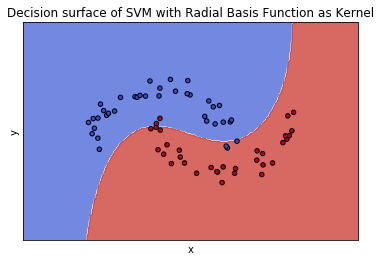

In [8]:
#To visualize the generated decision boundary
import numpy as np

def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of SVM with Radial Basis Function as Kernel')

# Set-up grid for plotting.
X0 = X_train.iloc[:, 0]
X1 = X_train.iloc[:, 1]

xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()